In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

from modules.forecasting.models.prophet import ProphetModel
from modules.forecasting.data.preprocess_coin import CoinPreprocessor
import modules.forecasting.models.prophet as prophet_pkg

model_dir = Path(prophet_pkg.__file__).parent / "saved" / "prophet"

model = ProphetModel("ETH", model_dir=model_dir)
model.load()

In [19]:
cp = CoinPreprocessor()
hist_df = cp.load_features_series("ETH", exchange="binance", interval="1h")
series = hist_df["close"]
print("history length:", len(series))

history length: 2966


In [20]:
df_prophet = hist_df.reset_index()
print(df_prophet.columns)

Index(['time', 'symbol', 'exchange', 'interval', 'open', 'high', 'low',
       'close', 'volume', 'returns', 'close_lag1', 'volatility', 'log_return',
       'vol_7', 'vol_30', 'sma_7', 'sma_21', 'ema_8', 'ema_20',
       'volume_pct_change', 'volume_zscore_30', 'hour', 'dayofweek', 'month',
       'is_month_start'],
      dtype='object')


In [21]:
df_prophet = df_prophet[['time', 'close']].rename(columns={'time': 'ds', 'close': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

print(df_prophet.head())

                         ds         y
0 2017-08-17 00:00:00+00:00  0.045962
1 2017-08-18 00:00:00+00:00  0.044268
2 2017-08-19 00:00:00+00:00  0.043626
3 2017-08-20 00:00:00+00:00  0.045351
4 2017-08-21 00:00:00+00:00  0.050445


In [22]:
df_prophet = hist_df.reset_index()
print(df_prophet.columns)

Index(['time', 'symbol', 'exchange', 'interval', 'open', 'high', 'low',
       'close', 'volume', 'returns', 'close_lag1', 'volatility', 'log_return',
       'vol_7', 'vol_30', 'sma_7', 'sma_21', 'ema_8', 'ema_20',
       'volume_pct_change', 'volume_zscore_30', 'hour', 'dayofweek', 'month',
       'is_month_start'],
      dtype='object')


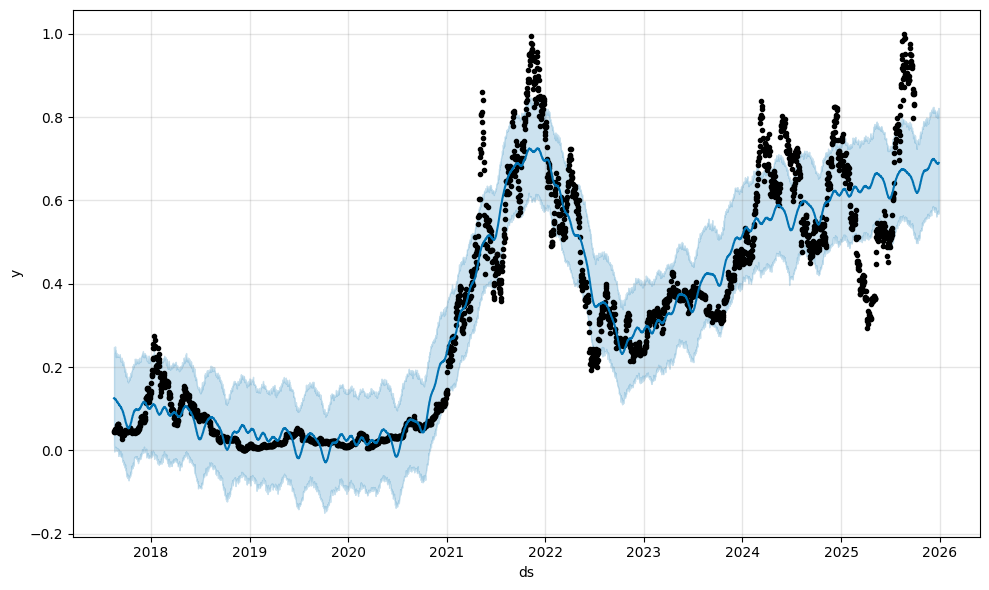

In [23]:
df_prophet = hist_df.reset_index()[["time", "close"]].rename(columns={"time": "ds", "close": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

forecast = model.model.predict(model.model.make_future_dataframe(periods=90, freq="D"))
fig1 = model.model.plot(forecast)
plt.show()

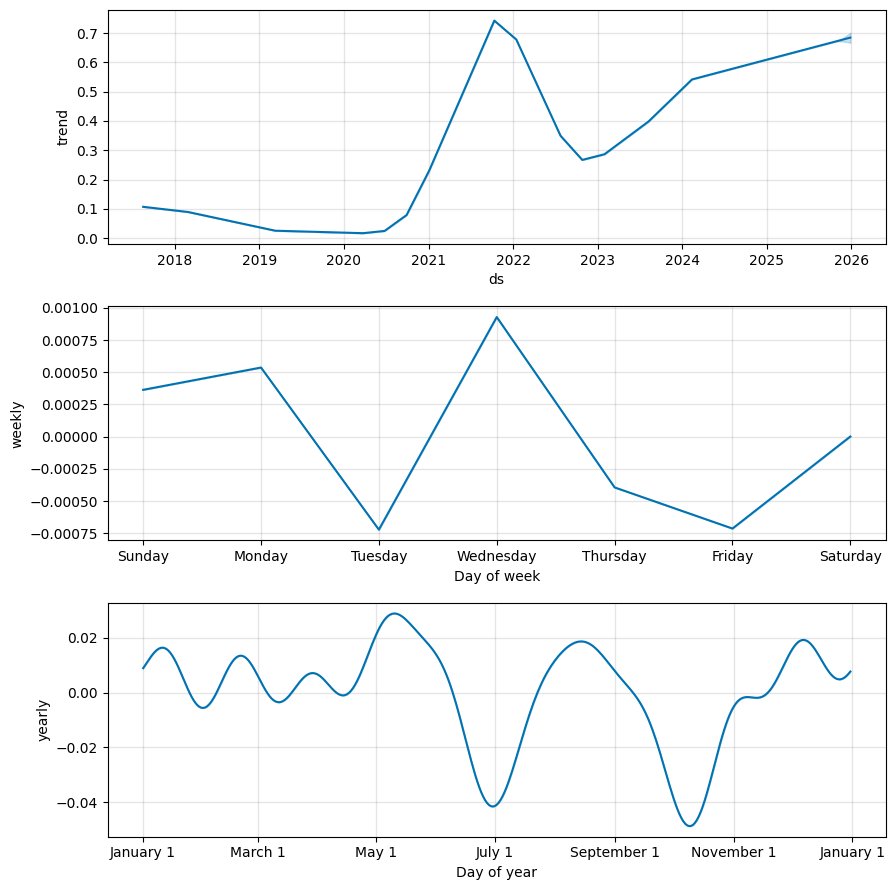

In [24]:
fig2 = model.model.plot_components(forecast)
plt.show()

c:\Users\sarfras\anaconda3\envs\crypto\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sarfras\AppData\Local\Temp\ipykernel_1656\853419631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prophet['log_return'].fillna(0, inplace=True)


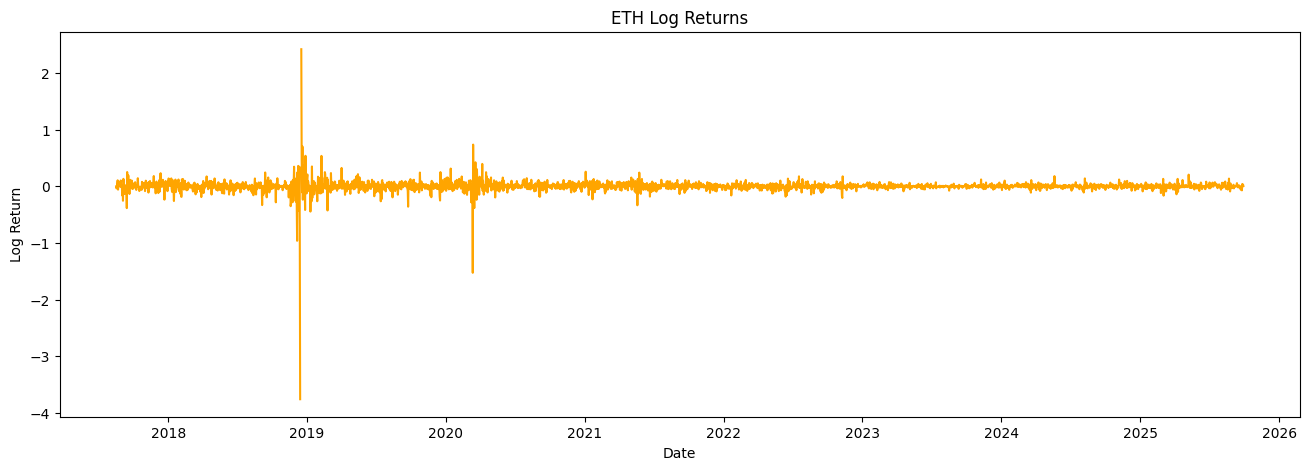

In [25]:
df_prophet['log_return'] = np.log(df_prophet['y'] / df_prophet['y'].shift(1))
df_prophet['log_return'].fillna(0, inplace=True)

plt.figure(figsize=(16,5))
plt.plot(df_prophet['ds'], df_prophet['log_return'], color='orange')
plt.title("ETH Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()

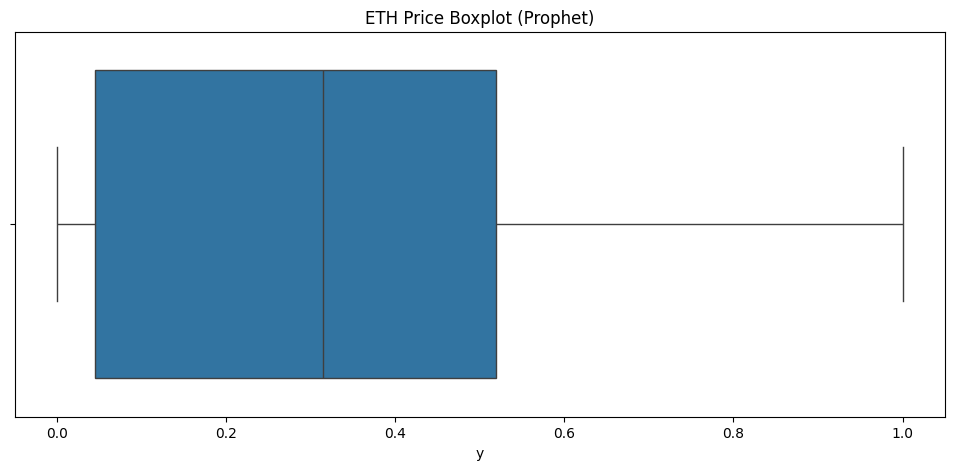

In [26]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df_prophet['y'])
plt.title("ETH Price Boxplot (Prophet)")
plt.show()
